## Business Challenge

Classify Stocks as flat, up or down.

I tested two classification algorithms, Decision Tree Model and Random Forest Classifier Model.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/Users/rev.dr.sylviablessings/Downloads/GOOGL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


## Calculate Moving Average
#### Simple moving average and exponential moving average
#### Calculate Moving Average Convergence & Divergence

In [5]:
def MA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [9]:
# Calculate short and long term EMA
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
    shortEMA = EMA(data, period=period_short, column=column)
    longEMA = EMA(data, period=period_long, column=column)
    data['MACD'] = shortEMA - longEMA
    data['signal'] = EMA(data, period=period_signal, column='MACD')

    return data

In [14]:
# Calculate RSI
def RSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    flat = 0
    data['up'] = up
    data['down'] = down
    data['flat'] = flat
    averageGain = MA(data, period, column='up')
    averageLoss = abs(MA(data, period, column='down'))
    RS = averageGain/averageLoss
    RSI = 100.0 - (100.0/(1.0 + RS))

    data['RSI'] = RSI
    return data

In [15]:
MACD(df)
RSI(df)
df['MA'] = MA(df)
df['EMA'] = EMA(df)

df.head()

/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_94382/1377137480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MACD'] = shortEMA - longEMA
/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_94382/1377137480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = EMA(data, period=period_signal, column='MACD')
/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_94382/1724897114.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Date,Open,High,Low,Close,Adj Close,Volume,MACF,MACD,signal,up,down,RSI,MA,EMA,Target,flat
29,2004-09-30,65.015015,66.216217,64.564568,64.864868,64.864868,13758028,3.151901,0.000000,0.000000,NaN,NaN,NaN,NaN,64.864868,1,0
30,2004-10-01,65.465462,67.187187,64.514519,66.356354,66.356354,15124860,3.387715,0.118979,0.023796,1.491486,0.000000,NaN,NaN,65.006914,1,0
31,2004-10-04,67.692696,68.503502,67.082085,67.597595,67.597595,13022764,3.632879,0.309857,0.081008,1.241241,0.000000,NaN,NaN,65.253646,1,0
32,2004-10-05,67.397400,69.334335,66.186188,69.254257,69.254257,14973212,3.915714,0.588029,0.182412,1.656662,0.000000,NaN,NaN,65.634656,0,0
33,2004-10-06,68.843842,69.294296,68.068069,68.608612,68.608612,13381405,4.041181,0.747764,0.295483,0.000000,-0.645645,NaN,NaN,65.917890,1,0


In [16]:
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_94382/1361030456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


,Date,Open,High,Low,Close,Adj Close,Volume,MACF,MACD,signal,up,down,RSI,MA,EMA,Target,flat
29,2004-09-30,65.015015,66.216217,64.564568,64.864868,64.864868,13758028,3.151901,0.000000,0.000000,NaN,NaN,NaN,NaN,64.864868,1,0
30,2004-10-01,65.465462,67.187187,64.514519,66.356354,66.356354,15124860,3.387715,0.118979,0.023796,1.491486,0.000000,NaN,NaN,65.006914,1,0
31,2004-10-04,67.692696,68.503502,67.082085,67.597595,67.597595,13022764,3.632879,0.309857,0.081008,1.241241,0.000000,NaN,NaN,65.253646,1,0
32,2004-10-05,67.397400,69.334335,66.186188,69.254257,69.254257,14973212,3.915714,0.588029,0.182412,1.656662,0.000000,NaN,NaN,65.634656,0,0
33,2004-10-06,68.843842,69.294296,68.068069,68.608612,68.608612,13381405,4.041181,0.747764,0.295483,0.000000,-0.645645,NaN,NaN,65.917890,1,0


## More Data Preprocessing

In [17]:
df = df[29:]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MACF,MACD,signal,up,down,RSI,MA,EMA,Target,flat
58,2004-11-10,85.420418,86.346344,83.248245,84.014015,84.014015,21266712,5.147450,4.372414,5.845444,0.000000,-0.420418,59.453653,79.966300,85.235634,1,0
59,2004-11-11,84.649651,91.966965,83.868866,91.601601,91.601601,29941029,5.086060,4.365677,5.549491,7.587586,0.000000,55.893155,80.857524,85.841917,0,0
60,2004-11-12,92.707710,94.994995,88.788788,91.091087,91.091087,33458708,4.939278,4.269923,5.293577,0.000000,-0.510514,46.442685,81.682015,86.341838,1,0
61,2004-11-15,90.315315,94.254257,89.464462,92.527527,92.527527,23779197,4.882576,4.260829,5.087027,1.436440,0.000000,52.097854,82.513013,86.930951,0,0
62,2004-11-16,88.838837,89.824821,85.500504,86.356354,86.356354,41792965,4.290223,3.712861,4.812194,0.000000,-6.171173,41.743513,83.083083,86.876228,0,0


## Split into Training and Testing Sets

In [19]:
columns = ['Close', 'MACD', 'signal', 'RSI', 'MA', 'EMA']
X = df[columns].values
y = df['Target'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

## Create Model

In [25]:
model =  DecisionTreeClassifier().fit(X_train, y_train)

In [26]:
print(model.score(X_train, y_train))

1.0


## Test Validity

In [27]:
print(model.score(X_test, y_test))

0.5142857142857142


In [28]:
predictions = model.predict(X_test)
print(predictions)

[0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0
 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50       434
           1       0.52      0.53      0.52       441

    accuracy                           0.51       875
   macro avg       0.51      0.51      0.51       875
weighted avg       0.51      0.51      0.51       875



In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_ = RandomForestClassifier().fit(X_train, y_train)

In [32]:
model_.score(X_test, y_test)

0.5211428571428571

In [35]:
predictions_ = model_.predict(X_test)
print(predictions_)

[1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1
 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1
 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 0 1 0 1 

In [36]:
print(classification_report(y_test, predictions_))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       434
           1       0.52      0.55      0.53       441

    accuracy                           0.52       875
   macro avg       0.52      0.52      0.52       875
weighted avg       0.52      0.52      0.52       875



In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [40]:
cfMatrix = confusion_matrix(y_test, predictions_)

<AxesSubplot: >

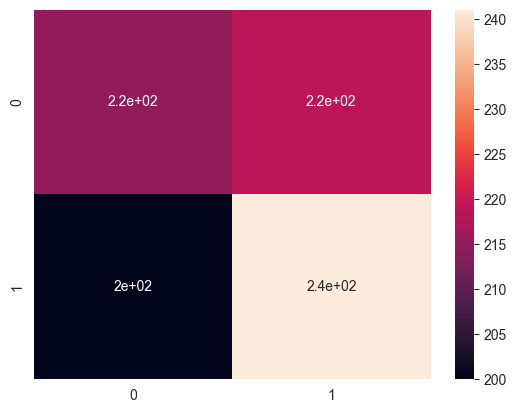

In [42]:
sns.heatmap(cfMatrix, annot=True)

<AxesSubplot: >

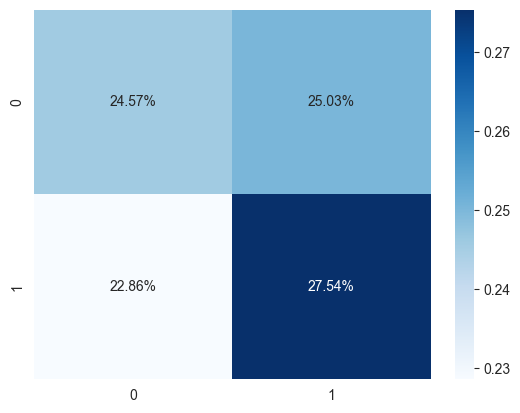

In [43]:
sns.heatmap(cfMatrix/np.sum(cfMatrix), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
labels = ['True Neg',  'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

<AxesSubplot: >

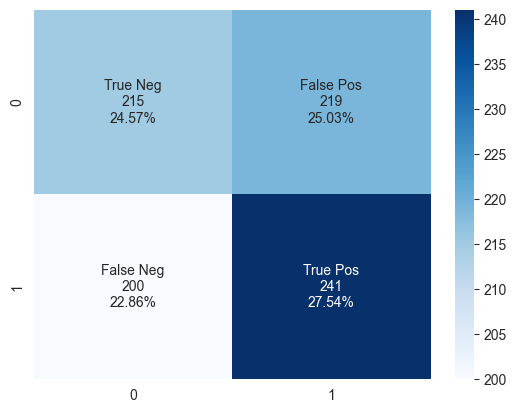

In [44]:
group_names = ['True Neg',  'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cfMatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfMatrix.flatten()/np.sum(cfMatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfMatrix, annot=labels, fmt='', cmap='Blues')

## Results and Takeaways

- The Random Forest Model performed better than the Decision Tree Model, with an overall accuracy of 52%. It means, under some conditions
we can use the ML classifiers to understand and predict the likely behavior and expected movement of the stock prices.
- Several steps can be taken to improve the model including inculcating additional features, build stop loss into the model.
- I would recommend trying Support Vector Machines and/or ANN algorithm and comparing their accuracy for the best model.